In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#linear regression algoritmasını çağırıyoruz
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#train test split veriyi ikiye ayırır biriyle eğitiyor biriyle test eder
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv('Updated_Mobile_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Model,Company,Price,Rating,No_of_ratings,TotalReviwes,RamSize,RomSize
0,0,"Infinix HOT 20 Play (Luna Blue, 64 GB)",Infinix,8199,4.3,505,52,4 GB,64 GB
1,1,"MOTOROLA e40 (Carbon Gray, 64 GB)",MOTOROLA,7999,4.1,"56,085","5,600",4 GB,64 GB
2,2,"MOTOROLA e40 (Pink Clay, 64 GB)",MOTOROLA,7999,4.1,"56,085","5,600",4 GB,64 GB
3,3,"POCO C31 (Shadow Gray, 64 GB)",POCO,7499,4.3,"1,83,688","11,185",4 GB,64 GB
4,4,"MOTOROLA G32 (Mineral Gray, 64 GB)",MOTOROLA,9999,4.2,"16,249","1,639",4 GB,64 GB


In [4]:
df.tail()

,Unnamed: 0,Model,Company,Price,Rating,No_of_ratings,TotalReviwes,RamSize,RomSize
28031,28699,"Redmi 9A Sport (Coral Green, 32 GB)",Redmi,7970,4.2,"5,872",437,3 GB,32 GB
28032,28700,"OPPO A54 (Starry Blue, 128 GB)",OPPO,15990,4.3,"4,016",228,6 GB,128 GB
28033,28701,Micromax X809,Micromax,1335,3.8,"4,827",424,32 MB,32 MB
28034,28702,Kechaoda K200,Kechaoda,1270,4.0,112,5,32 MB,32 MB
28035,28703,"SAMSUNG Galaxy A23 (Peach, 128 GB)",SAMSUNG,18499,4.2,725,48,6 GB,128 GB


In [5]:
df.shape

(28036, 9)

In [6]:
df.sample(5)

,Unnamed: 0,Model,Company,Price,Rating,No_of_ratings,TotalReviwes,RamSize,RomSize
18808,19186,"realme 9 (Stargaze White, 128 GB)",realme,14599,4.4,"55,583","4,035",6 GB,128 GB
22190,22672,"vivo V23e 5G (Sunshine Gold, 128 GB)",vivo,22997,4.2,"1,890",172,8 GB,128 GB
26873,27500,itel power 100,itel,1330,4.1,519,37,4 MB,4 MB
27587,28233,itel U20,itel,1099,4.1,867,69,4 MB,32 MB
9319,9435,"vivo Y75 (Dancing waves, 128 GB)",vivo,19990,4.2,"1,465",124,8 GB,128 GB


In [7]:
df.describe()

,Unnamed: 0,Price,Rating
count,28036.000000,28036.000000,28036.000000
mean,14281.621059,15228.305785,4.234060
std,8299.298422,17170.537998,0.210163
min,0.000000,698.000000,2.700000
25%,7074.750000,5999.000000,4.100000
50%,14250.500000,11999.000000,4.200000
75%,21468.250000,16990.000000,4.400000
max,28703.000000,149900.000000,4.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28036 entries, 0 to 28035
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     28036 non-null  int64  
 1   Model          28036 non-null  object 
 2   Company        28036 non-null  object 
 3   Price          28036 non-null  int64  
 4   Rating         28036 non-null  float64
 5   No_of_ratings  28036 non-null  object 
 6   TotalReviwes   28036 non-null  object 
 7   RamSize        28036 non-null  object 
 8   RomSize        28036 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


In [9]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Company          0
Price            0
Rating           0
No_of_ratings    0
TotalReviwes     0
RamSize          0
RomSize          0
dtype: int64

In [10]:
df.corr()

,Unnamed: 0,Price,Rating
Unnamed: 0,1.000000,0.008724,-0.082934
Price,0.008724,1.000000,0.547090
Rating,-0.082934,0.547090,1.000000


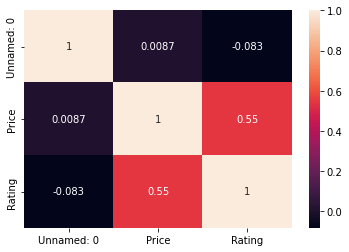

In [11]:
sns.heatmap(df.corr(), annot=True); #hangi sütunun hangi sütuna nasıl bağlı olduğunu gösterir

In [12]:
abs(df.corr()['Price']).sort_values(ascending=False)

Price         1.000000
Rating        0.547090
Unnamed: 0    0.008724
Name: Price, dtype: float64

In [13]:
Tratings = df['No_of_ratings'].str.split()

In [14]:
df.No_of_ratings.replace(to_replace=',', value='', regex = True, inplace = True)

In [15]:
df.No_of_ratings =df.No_of_ratings.astype(int)

In [16]:
df.TotalReviwes.replace(to_replace=',', value='', regex = True, inplace = True)

In [17]:
df.TotalReviwes =df.TotalReviwes.astype(int)

In [18]:
fRam = df.RamSize.str.split()
fRam

0         [4, GB]
1         [4, GB]
2         [4, GB]
3         [4, GB]
4         [4, GB]
           ...   
28031     [3, GB]
28032     [6, GB]
28033    [32, MB]
28034    [32, MB]
28035     [6, GB]
Name: RamSize, Length: 28036, dtype: object

In [19]:
df.RamSize.replace(to_replace='KB', value='', regex = True, inplace = True)
df.RamSize.replace(to_replace='MB', value='', regex = True, inplace = True)
df.RamSize.replace(to_replace='GB', value='', regex = True, inplace = True)

In [20]:
df.RamSize.replace(to_replace='6.6', value='0', regex = True, inplace = True)
df.RamSize.replace(to_replace='cm', value='', regex = True, inplace = True)
df.RamSize.unique()

array(['4 ', '6 ', '128 ', '2 ', '32 ', '8 ', '3 ', '64 ', '256 ',
       'NA ROM', '0 ', '12 ', '31 ', '30 ', '153 ', '24 ', '56 ', '10 ',
       'NA ', 'Expandable Upto', '52 ', '6.1 ', '512 ', '16 ', '20 '],
      dtype=object)

In [21]:
df.RamSize = df.RamSize.replace(to_replace=['Expandable Upto','NA MB','NA ROM','NA ']
                                           ,value='0',regex = True)

In [22]:
df.RomSize = df.RomSize.replace(to_replace=['Expandable Upto','Not Known','NA MB','QVGA Display','KB ROM','Upto 16'],
                                            value='0',regex=True)

In [23]:
df.RamSize.replace(to_replace='6.1', value='0', regex = True, inplace = True)
df.RamSize.astype(int)

0         4
1         4
2         4
3         4
4         4
         ..
28031     3
28032     6
28033    32
28034    32
28035     6
Name: RamSize, Length: 28036, dtype: int64

In [24]:
fRom = df.RomSize.str.split()

In [25]:
df.RomSize.replace(to_replace='GB', value='', regex = True, inplace = True)

In [26]:
df.RomSize.replace(to_replace='MB', value='', regex = True, inplace = True)
df.RomSize

0         64 
1         64 
2         64 
3         64 
4         64 
         ... 
28031     32 
28032    128 
28033     32 
28034     32 
28035    128 
Name: RomSize, Length: 28036, dtype: object

In [27]:
df.RomSize.replace(to_replace='2.27', value='0', regex = True, inplace = True)
df.RomSize.unique()

array(['64 ', '128 ', '0', '32 ', '4 ', '3 ', '0 ', '256 ', '24 ', '153 ',
       '36 ', '10 ', '8 ', '1 KB', '32 KB', '20 ', '56 '], dtype=object)

In [28]:
df.RomSize.replace(to_replace='KB', value='', regex = True, inplace = True)
df['RamSize']=df.RamSize.astype(int)
df['RomSize']=df.RomSize.astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28036 entries, 0 to 28035
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     28036 non-null  int64  
 1   Model          28036 non-null  object 
 2   Company        28036 non-null  object 
 3   Price          28036 non-null  int64  
 4   Rating         28036 non-null  float64
 5   No_of_ratings  28036 non-null  int64  
 6   TotalReviwes   28036 non-null  int64  
 7   RamSize        28036 non-null  int64  
 8   RomSize        28036 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.9+ MB


In [30]:
del df['Model']

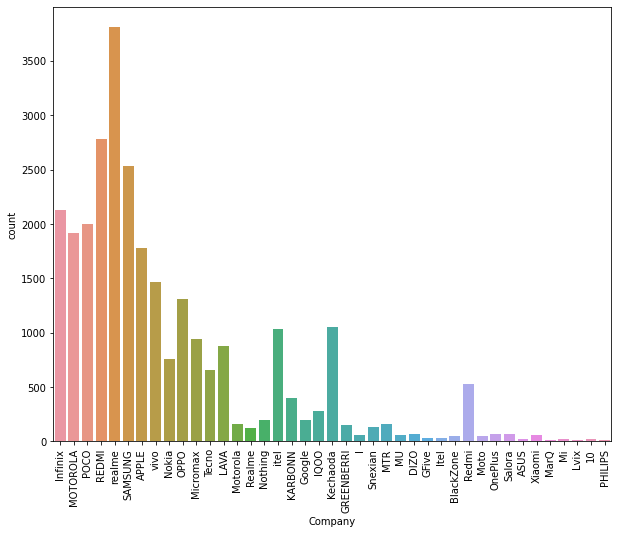

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Company'])
plt.xticks(rotation=90);

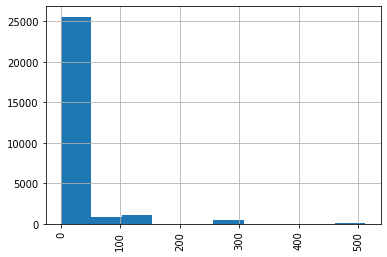

In [32]:
df['RamSize'].hist() 
plt.xticks(rotation=90);

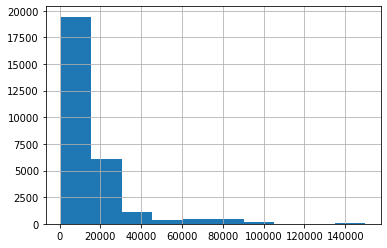

In [33]:
df['Price'].hist() 

In [34]:
df['Company'].value_counts()

realme        3808
REDMI         2784
SAMSUNG       2534
Infinix       2126
POCO          2001
MOTOROLA      1912
APPLE         1780
vivo          1462
OPPO          1306
Kechaoda      1049
itel          1038
Micromax       941
LAVA           873
Nokia          757
Tecno          657
Redmi          531
KARBONN        403
IQOO           279
Google         199
Nothing        199
Motorola       162
MTR            161
GREENBERRI     147
Snexian        130
Realme         122
Salora          72
OnePlus         71
DIZO            67
MU              63
I               59
Xiaomi          57
Moto            52
BlackZone       50
GFive           36
Itel            35
Mi              26
10              22
ASUS            21
MarQ            17
Lvix            15
PHILIPS         12
Name: Company, dtype: int64

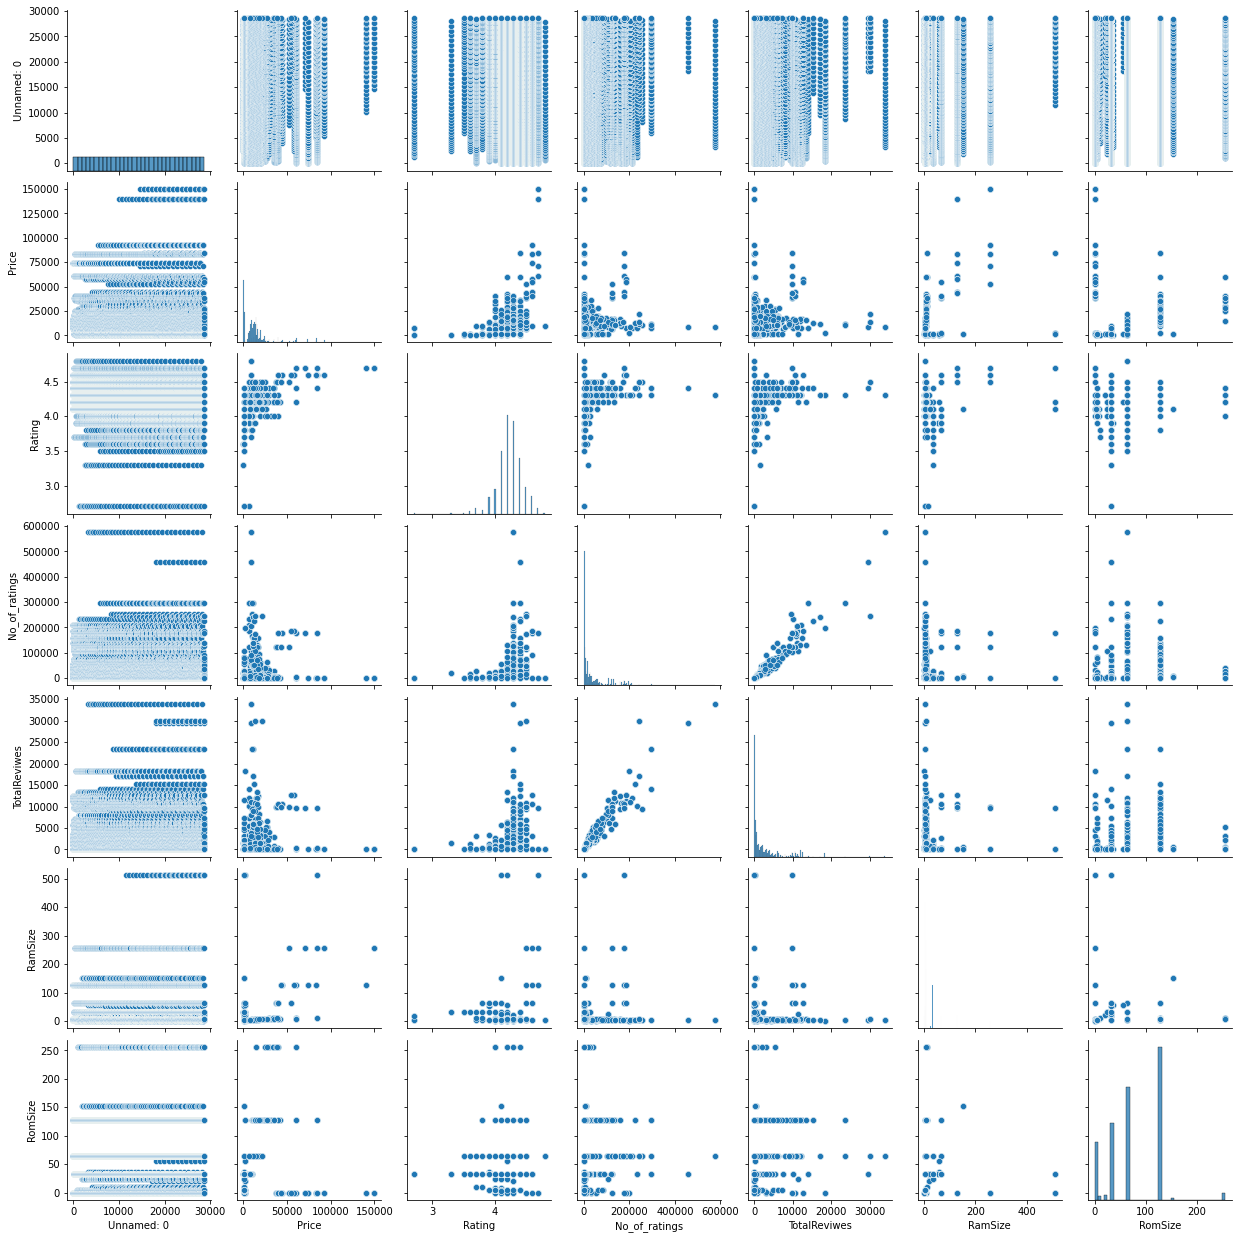

In [35]:
sns.pairplot(df)

##Modelling

In [36]:
x=df.drop(['Price'],axis=1)
# modeli kurarken x'in hangi sütunları kapsadığını belirliyoruz.

In [37]:
y=df[['Price']] #Fiyatı y'e eşitliyoruz
#not= ikitane parantez ile dataframe oluyor,dataframe tablo olrak görebilmemizi sağlar

In [38]:
x=pd.get_dummies(x,drop_first=True)#

In [39]:
x.head()

,Unnamed: 0,Rating,No_of_ratings,TotalReviwes,RamSize,RomSize,Company_APPLE,Company_ASUS,Company_BlackZone,Company_DIZO,...,Company_Realme,Company_Redmi,Company_SAMSUNG,Company_Salora,Company_Snexian,Company_Tecno,Company_Xiaomi,Company_itel,Company_realme,Company_vivo
0,0,4.3,505,52,4,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.1,56085,5600,4,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4.1,56085,5600,4,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4.3,183688,11185,4,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.2,16249,1639,4,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y

,Price
0,8199
1,7999
2,7999
3,7499
4,9999
...,...
28031,7970
28032,15990
28033,1335
28034,1270


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=42)
#x ve y'yi alıp eğitmek ve test etmek için ikiye böler.
#%80 eğitim için ayırıyoruz ,%20'yi teste ayırıyoruz.
#random her seferinde farklı seçiyor.
#random_state aynı verileri seçiyor böylelikle eğitip test etmek kolaylaşıyor
#seed=rakamları yeniden çalıştırdığımızda yine ayrı verileri seçer.

In [42]:
x_train.shape, x_test.shape#boyutuna bakar.
#22428 tanesini eğitiyor.
#5608 tanesini test ediyor.

((22428, 46), (5608, 46))

In [43]:
x_train 
#random_state=42 kullandığımız için ne kadar güncellersek güncelleyelim hep aynı sıralama çıkar

,Unnamed: 0,Rating,No_of_ratings,TotalReviwes,RamSize,RomSize,Company_APPLE,Company_ASUS,Company_BlackZone,Company_DIZO,...,Company_Realme,Company_Redmi,Company_SAMSUNG,Company_Salora,Company_Snexian,Company_Tecno,Company_Xiaomi,Company_itel,Company_realme,Company_vivo
4973,5008,4.2,24816,1801,32,32,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2252,2256,4.2,9919,738,3,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23361,23884,4.6,185701,12675,128,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2789,2798,4.4,30596,3739,6,128,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3953,3977,4.2,107469,11417,24,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,22040,4.2,14750,1095,4,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,5432,4.4,44415,2930,6,128,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
860,860,4.2,5507,644,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15795,16078,4.3,5488,302,4,64,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
lr=LinearRegression()

In [45]:
model=lr.fit(x_train,y_train) #makineye öğrettik

In [46]:
tahmin=lr.predict(x_test) #test verilerini verip y_test'i tahmin ettirdik.
#test için ayırdığımız verinin sonuçlarını tahmin eder.

In [47]:
(mean_squared_error(tahmin,y_test))**.5
#tahmin ettiğimiz değer ile gerçek değeri karşılaştır ve karekökünü al

6231.141996558698

In [48]:
r2_score(tahmin,y_test)

0.8439030806695672

In [49]:
from sklearn.linear_model import Ridge,Lasso
#Ridge,=hatanın karesini alıyor hatayı 0'a çekmeye çalışıyor.
#Lasso=hatanın mutlak değerini alarak hatayı azaltmaya çalışıyor.

In [50]:
R=Ridge()
L=Lasso()

In [51]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test)

In [52]:
(mean_squared_error(tahmin2,y_test))**.5 #hatayı hesaplıyoruz.

6232.338332659166

In [53]:
r2_score(tahmin2,y_test)

0.843504150301298

In [54]:
L.fit(x_train,y_train)
tahmin3=L.predict(x_test)

In [55]:
(mean_squared_error(tahmin3,y_test))**.5
#**.5=karesini almak.
# .5 = 0.5
#hata oranını verir.

6231.579958254137

In [56]:
r2_score(tahmin3,y_test)#başarı oranını verir.

0.8435630754505912

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
E=ElasticNet(l1_ratio=0.8)

In [59]:
E.fit(x_train,y_train)

ElasticNet(l1_ratio=0.8)

In [60]:
tahmin4=E.predict(x_test)

In [61]:
r2_score(tahmin4,y_test)

0.11999552690634563